# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Data Trends
1) Temperature increases as we move toward the equator and appears to be highest at about 20 - 40 degrees latitude.
2) There is not much, if any correlation, between latitude and humidity or cloudiness.
3) It appears that wind speed increases some moving away from the equator.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
    
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=rikitea
Processing Record 2 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=punta arenas
Processing Record 3 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=lagoa
Processing Record 4 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=jamestown
Processing Record 5 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=port macquarie
City not found. Skipping...
Processing Record 6 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=chokurdakh
Processing Record 7 | Mataura
http://ap

Processing Record 56 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=pisco
Processing Record 57 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=constitucion
Processing Record 58 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=butaritari
Processing Record 59 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=ponta do sol
Processing Record 60 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=pacific grove
Processing Record 61 | Don Sak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=don sak
Processing Record 62 | China
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00bec

Processing Record 112 | Manggar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=manggar
Processing Record 113 | Zabol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=zabol
Processing Record 114 | Osypenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=osypenko
Processing Record 115 | Pando
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=pando
Processing Record 116 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=puerto ayora
Processing Record 117 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=vila franca do campo
Processing Record 118 | Lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3c

Processing Record 168 | Kinablangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=kinablangan
Processing Record 169 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=lavrentiya
Processing Record 170 | Kaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=kaka
Processing Record 171 | Felipe Carrillo Puerto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=felipe carrillo puerto
Processing Record 172 | Beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=beloha
Processing Record 173 | El Tigre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=el tigre
Processing Record 174 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=97

Processing Record 222 | Zhuhai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=zhuhai
City not found. Skipping...
Processing Record 223 | Mozhga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=mozhga
Processing Record 224 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=kruisfontein
Processing Record 225 | Caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=caravelas
Processing Record 226 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=paamiut
Processing Record 227 | Waddan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=waddan
Processing Record 228 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784

Processing Record 277 | Listvyanskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=listvyanskiy
Processing Record 278 | Vieques
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=vieques
Processing Record 279 | Partizanskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=partizanskoye
Processing Record 280 | Durban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=durban
Processing Record 281 | Hollins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=hollins
Processing Record 282 | Talmenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=talmenka
Processing Record 283 | Jasper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff

Processing Record 333 | Dauphin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=dauphin
Processing Record 334 | Chernaya Kholunitsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=chernaya kholunitsa
Processing Record 335 | Pascagoula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=pascagoula
Processing Record 336 | Toamasina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=toamasina
Processing Record 337 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=tura
Processing Record 338 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=sinnamary
Processing Record 339 | Aasiaat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3

Processing Record 388 | Eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=eureka
Processing Record 389 | Teya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=teya
Processing Record 390 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=lebu
City not found. Skipping...
Processing Record 391 | Barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=barcelos
Processing Record 392 | Saurimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=saurimo
Processing Record 393 | Praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=praia
Processing Record 394 | Byron Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a

Processing Record 444 | Ouadda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=ouadda
Processing Record 445 | North Shore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=north shore
Processing Record 446 | Smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=smithers
Processing Record 447 | Vega de Alatorre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=vega de alatorre
Processing Record 448 | Sajanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=sajanan
Processing Record 449 | Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=aykhal
Processing Record 450 | Mairang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becd

Processing Record 500 | Sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=sorong
Processing Record 501 | Alingsas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=alingsas
City not found. Skipping...
Processing Record 502 | Mapiripan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=mapiripan
Processing Record 503 | Ayamonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=ayamonte
City not found. Skipping...
Processing Record 504 | Mikhaylovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=mikhaylovsk
City not found. Skipping...
Processing Record 505 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9784dd06a3ca00becdbff2cf511a3d17&q=beringovskiy
Processing Record 506 | Poum
http:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame







In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()


City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

In [6]:
# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,83,PF,1566774708,63,-23.12,-134.97,69.20,9.80
1,Punta Arenas,75,CL,1566774709,70,-53.16,-70.91,44.60,10.29
2,Lagoa,0,PT,1566774710,83,37.14,-8.45,69.80,1.12
3,Jamestown,0,AU,1566774578,65,-33.21,138.60,48.68,4.43
4,Port Macquarie,40,AU,1566774713,76,-31.43,152.91,70.00,5.82


In [7]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

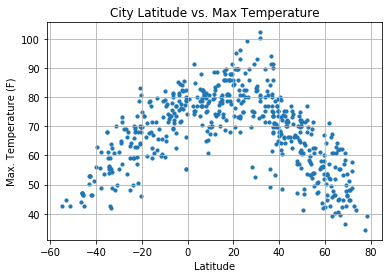

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

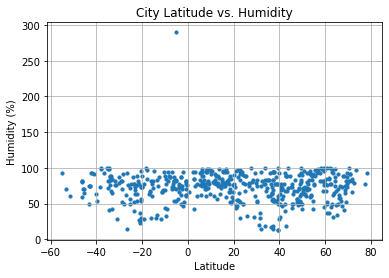

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

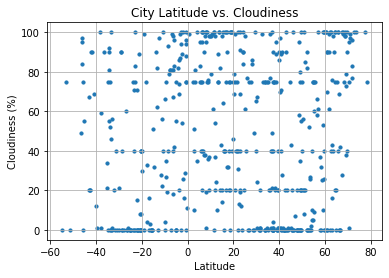

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

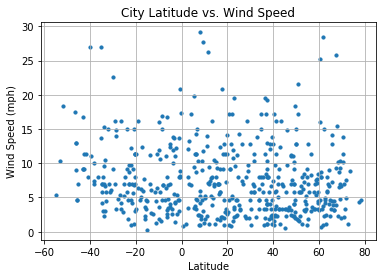

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()
